In [81]:
# 1. dataset <- transaction.csv, dan tampilkan
import pandas as pd 
import numpy as np 

dataset = pd.read_csv('transaction.csv')
dataset.head()

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland


In [82]:
# 2. country <- berapa kemunculan tiap negara pada dataset, dan tampilkan
country = dataset['Country'].value_counts()
country.head()

Country
Germany        2269
France         2109
EIRE           1620
Netherlands     634
Spain           539
Name: count, dtype: int64

In [83]:
# 3. Menghitung jumlah transaksi per negara (1 InvoiceNo = 1 transaksi)
transaksi = dataset.groupby('Country')['InvoiceNo'].nunique()
print(transaksi)

Country
Australia                44
Austria                  12
Bahrain                   1
Belgium                  84
Brazil                    1
Canada                    3
Channel Islands          21
Cyprus                   16
Czech Republic            2
Denmark                  18
EIRE                    224
European Community        3
Finland                  26
France                  344
Germany                 377
Greece                    5
Iceland                   6
Israel                    4
Italy                    31
Japan                    14
Lebanon                   1
Lithuania                 2
Malta                     2
Netherlands              76
Norway                   28
Poland                   17
Portugal                 43
RSA                       1
Saudi Arabia              1
Singapore                 4
Spain                    72
Sweden                   26
Switzerland              41
USA                       5
United Arab Emirates      2
Unspecified 

In [84]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 4. Lakukan clustering pada data transaksi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(transaksi.values.reshape(-1, 1))

cluster_model = AgglomerativeClustering(n_clusters=3, linkage='average')
cluster = cluster_model.fit_predict(X_scaled)

# Tambahkan hasil cluster ke data transaksi
transaksi_clustered = pd.DataFrame({
    'Country': transaksi.index,
    'Transaksi': transaksi.values,
    'Cluster': cluster
})

print(transaksi_clustered)

                 Country  Transaksi  Cluster
0              Australia         44        0
1                Austria         12        0
2                Bahrain          1        0
3                Belgium         84        0
4                 Brazil          1        0
5                 Canada          3        0
6        Channel Islands         21        0
7                 Cyprus         16        0
8         Czech Republic          2        0
9                Denmark         18        0
10                  EIRE        224        2
11    European Community          3        0
12               Finland         26        0
13                France        344        1
14               Germany        377        1
15                Greece          5        0
16               Iceland          6        0
17                Israel          4        0
18                 Italy         31        0
19                 Japan         14        0
20               Lebanon          1        0
21        

In [85]:
# 5. Tentukan posisi centroid dari setiap cluster
centroid = transaksi_clustered.groupby('Cluster')['Transaksi'].mean()

print(centroid)

Cluster
0     18.787879
1    360.500000
2    224.000000
Name: Transaksi, dtype: float64


In [86]:
# 6. Urutkan centroid secara ascending
sorted_centroid = centroid.sort_values(ascending=True)
print(sorted_centroid)

Cluster
0     18.787879
2    224.000000
1    360.500000
Name: Transaksi, dtype: float64


In [87]:
# 7. Identifikasi negara berdasarkan cluster transaksi rendah, sedang, tinggi
low_cluster = sorted_centroid.index[0]
mid_cluster = sorted_centroid.index[1]
high_cluster = sorted_centroid.index[2]

negara_rendah = transaksi_clustered[transaksi_clustered['Cluster'] == low_cluster]['Country']
negara_sedang = transaksi_clustered[transaksi_clustered['Cluster'] == mid_cluster]['Country']
negara_tinggi = transaksi_clustered[transaksi_clustered['Cluster'] == high_cluster]['Country']

print("Negara dengan transaksi rendah:\n", negara_rendah)
print("Negara dengan transaksi sedang:\n", negara_sedang)
print("Negara dengan transaksi tinggi:\n", negara_tinggi)


Negara dengan transaksi rendah:
 0                Australia
1                  Austria
2                  Bahrain
3                  Belgium
4                   Brazil
5                   Canada
6          Channel Islands
7                   Cyprus
8           Czech Republic
9                  Denmark
11      European Community
12                 Finland
15                  Greece
16                 Iceland
17                  Israel
18                   Italy
19                   Japan
20                 Lebanon
21               Lithuania
22                   Malta
23             Netherlands
24                  Norway
25                  Poland
26                Portugal
27                     RSA
28            Saudi Arabia
29               Singapore
30                   Spain
31                  Sweden
32             Switzerland
33                     USA
34    United Arab Emirates
35             Unspecified
Name: Country, dtype: object
Negara dengan transaksi sedang:
 10    EIRE
Nam

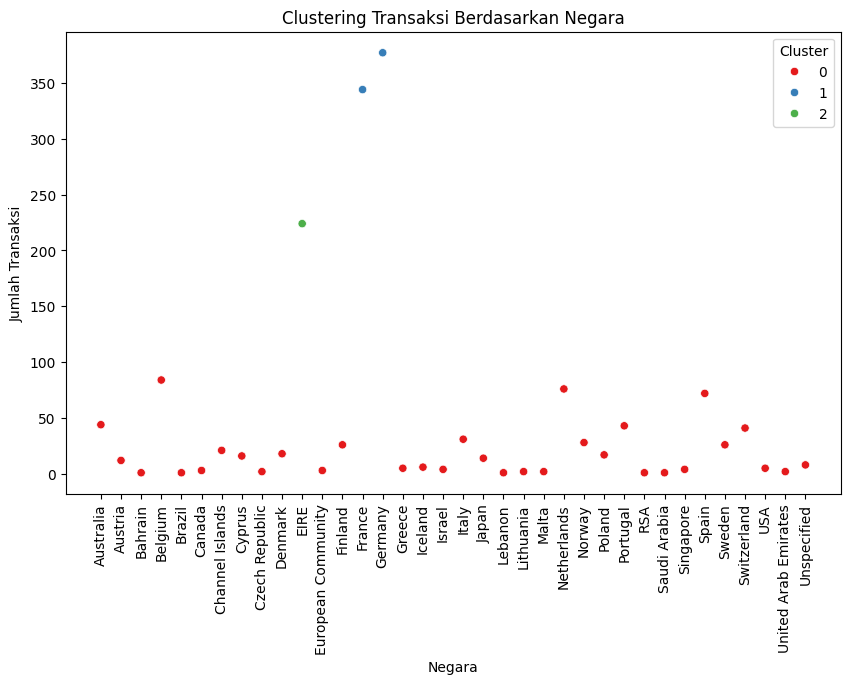

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# 8. Visualisasi hasil cluster dengan warna berbeda
plt.figure(figsize=(10, 6))

# Urutkan data untuk visualisasi
transaksi_clustered_sorted = transaksi_clustered.sort_values('Country')

# Buat scatter plot dengan warna berbeda berdasarkan cluster
sns.scatterplot(x='Country', y='Transaksi', hue='Cluster', data=transaksi_clustered_sorted, palette='Set1')

plt.xticks(rotation=90)
plt.title("Clustering Transaksi Berdasarkan Negara")
plt.xlabel("Negara")
plt.ylabel("Jumlah Transaksi")
plt.show()